In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('Mall_Customers1.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [72]:
numerical_cols = ['Age', 'Annual Income', 'Spending Score']
data = df[numerical_cols]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

<Figure size 1000x600 with 0 Axes>

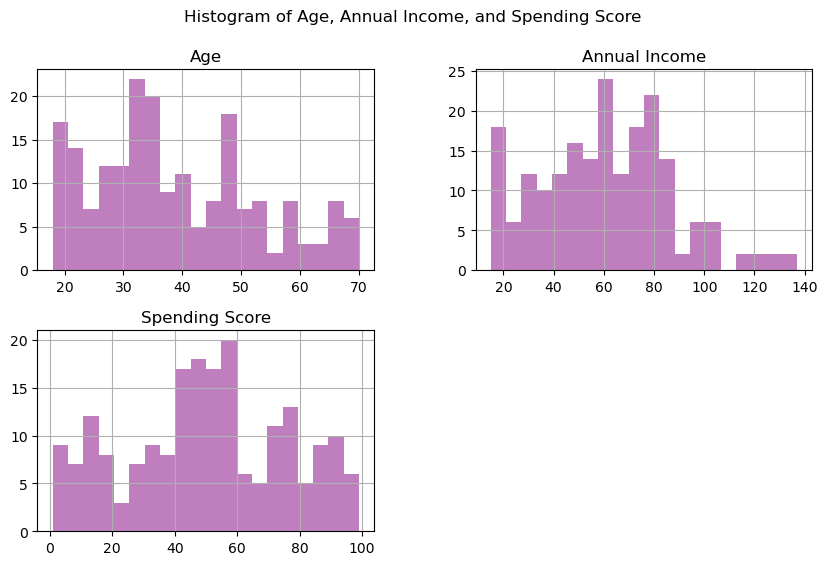

In [74]:
def histogram_1(data):
    plt.figure(figsize=(10, 6))
    df[numerical_cols].hist(bins=20, figsize=(10, 6),color='purple',alpha=0.5)
    plt.suptitle('Histogram of Age, Annual Income, and Spending Score')
    plt.show()
histogram_1(data)

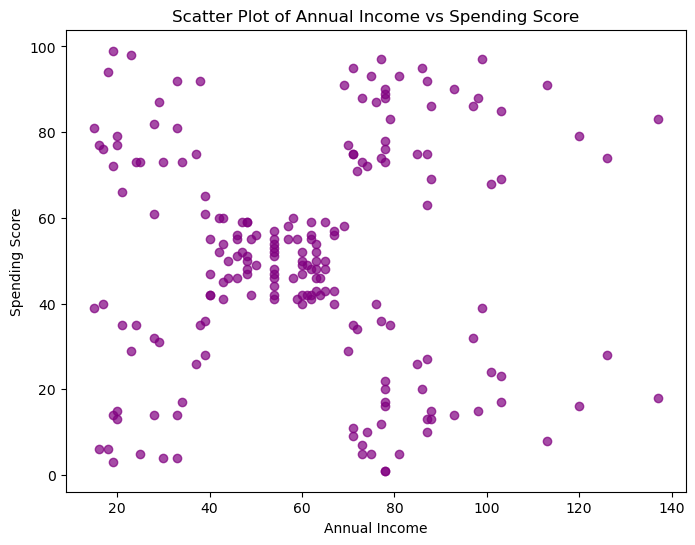

In [76]:
def scatterplot_1(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Annual Income'], df['Spending Score'], c='purple', alpha=0.7)
    plt.title('Scatter Plot of Annual Income vs Spending Score')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()
scatterplot_1(data)

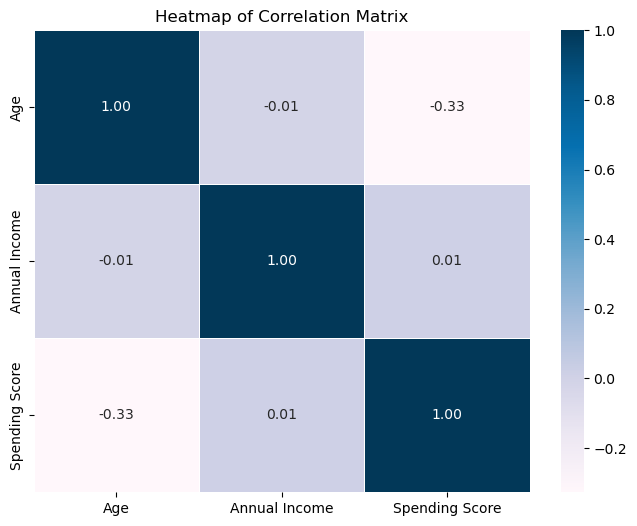

In [85]:
def heatmap_1(data):
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()
heatmap_1(data)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

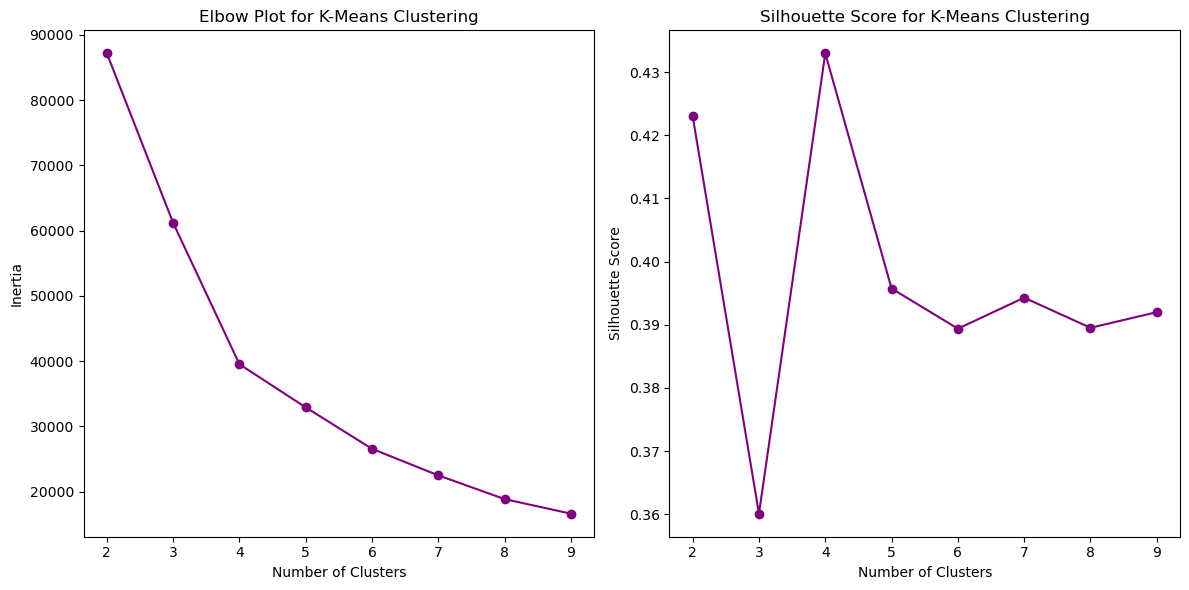

In [80]:
def plot_elbow_and_silhouette_1():
    inertia = []
    silhouette_avg = []
    k_range = range(2, 10)
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data[['Age', 'Annual Income']])
        inertia.append(kmeans.inertia_)
        silhouette_avg.append(silhouette_score(data[['Age', 'Annual Income']], kmeans.labels_)                          
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia, marker='o', color='purple', label='Inertia')
    plt.title('Elbow Plot for K-Means Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_avg, marker='o', color='purple', label='Silhouette Score')
    plt.title('Silhouette Score for K-Means Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.show()

plot_elbow_and_silhouette_1()


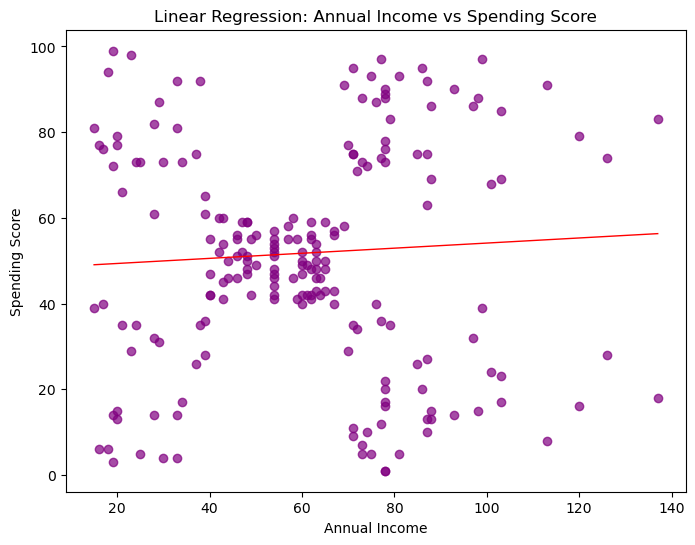

In [82]:
def line_fiting_1(data):
    X = df[['Annual Income']].values  
    y = df['Spending Score'].values  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='purple', alpha=0.7)
    plt.plot(X, model.predict(X), color='r', linewidth=1)
    plt.title('Linear Regression: Annual Income vs Spending Score')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()
line_fiting_1(data)